In [34]:
from utils import collect
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
path = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/distillation/")
path_baseline = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/baselines")
sns.set_context("talk")
sns.set_style("whitegrid")

paths_amda=[Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/shashank_runs/imagenet100_runs/amda_teacher_amda_student_crd/crd_1.0"),
           Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/experiments/img100/kd/kd_amda/4"),
           Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/tryout_at/1")]
import string

NAME_TEACHERS = {"AttentionDistill": "Attention (AT)", "KnowledgeDistill": "Original (KD)", "ContrastiveDistill": "Contrastive (CRD)"}
MARKERS_TEACHERS = {"Attention (AT)": "X" , "Original (KD)": "^", "Contrastive (CRD)": "h"}

In [35]:
df_amda=collect(*paths_amda).sort_values(by=["Loss"])
df_amda

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture
90,True,True,True,30,10.939997,26.958394,51.105794,0.1,AttentionDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,None
90,True,True,True,30,10.659999,25.830662,50.937662,0.1,ContrastiveDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,1,AMDA ResNet50,0.0002,4.0,None
90,True,True,True,30,10.560000,26.002133,50.012934,0.1,KnowledgeDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,1,AMDA ResNet50,0.0002,4.0,None


In [36]:
df_std=collect(path).query("Network=='resnet18' & Teacher=='AMDA ResNet50'").sort_values(by=["Loss"])
df_std

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture
270,False,False,False,90,10.740000,42.610139,59.829280,0.1,AttentionDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,None
270,False,False,False,90,10.380000,45.780802,65.565184,0.1,ContrastiveDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,None
270,False,False,False,90,9.719998,38.957065,57.287896,0.1,KnowledgeDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,0.9


In [37]:
df_baseline=collect(path_baseline).query("Network=='resnet18' & Scaling==1 & not Amda")
df_baseline

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
270,False,False,False,90,11.739999,51.112539,68.669167,0.1,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,0.0002,None,None


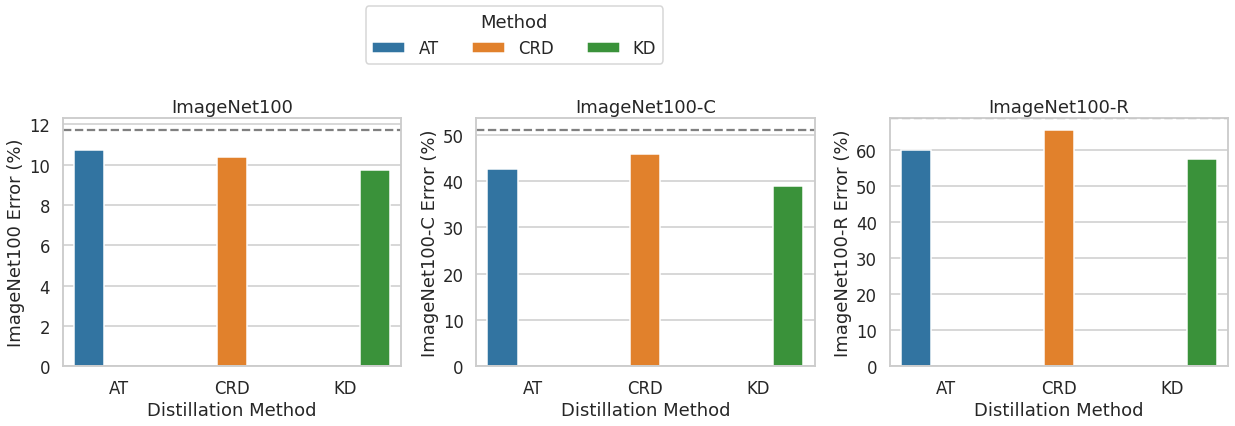

In [38]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(17.5, 5))
df_std=df_std.replace("AttentionDistill", "AT")
df_std=df_std.replace("ContrastiveDistill", "CRD")
df_std=df_std.replace("KnowledgeDistill", "KD")
for ax, error in zip(axes.flatten(), ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]):
    sns.barplot(data=df_std, x="Loss", y=error, hue="Loss", ax=ax)
    ax.set_xlabel("Distillation Method")
    ax.set_ylabel(error + " (%)")
    ax.set_title(error.split(" ")[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend('', frameon=False)
    ax.axhline(df_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
fig.legend(handles, labels, bbox_to_anchor=(0.3, 1.2), loc=2, borderaxespad=0., ncol=3, title='Method')
fig.tight_layout()
plt.savefig(f"figures/distillation_std.pdf")

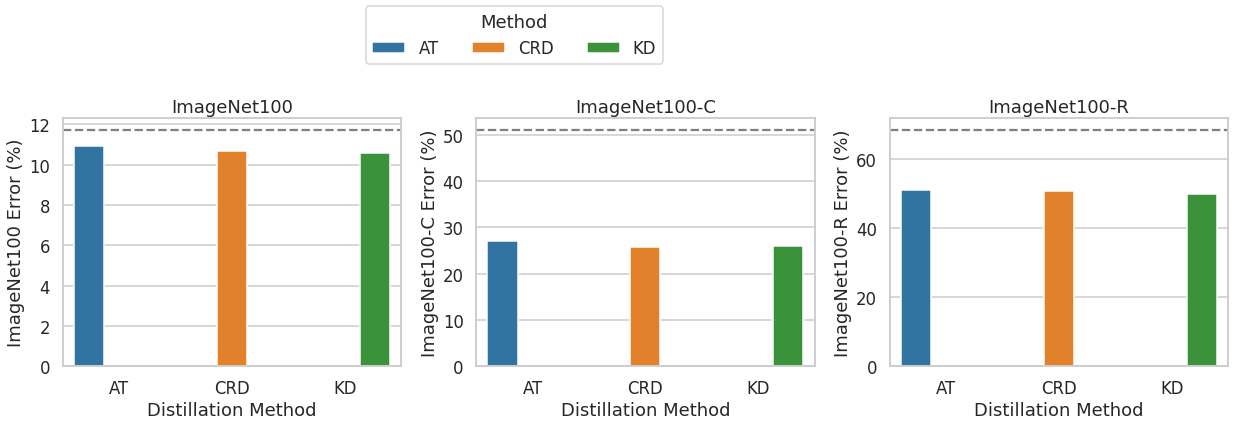

In [39]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(17.5, 5))
df_amda=df_amda.replace("AttentionDistill", "AT")
df_amda=df_amda.replace("ContrastiveDistill", "CRD")
df_amda=df_amda.replace("KnowledgeDistill", "KD")
for ax, error in zip(axes.flatten(), ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]):
    sns.barplot(data=df_amda, x="Loss", y=error, hue="Loss", ax=ax)
    ax.set_xlabel("Distillation Method")
    ax.set_ylabel(error + " (%)")
    ax.set_title(error.split(" ")[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend('', frameon=False)
    ax.axhline(df_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
fig.legend(handles, labels, bbox_to_anchor=(0.3, 1.2), loc=2, borderaxespad=0., ncol=3, title='Method')
fig.tight_layout()
plt.savefig(f"figures/distillation_amda.pdf")

In [42]:
df_amda_res=collect(path_baseline).query("Network=='resnet18' & Scaling==1 & Amda")
df_amda_res=df_amda_res.replace("StandardLoss", "AMDA")
df_amda_res

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
90,True,True,True,30,12.980002,28.012806,53.563115,0.1,AMDA,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,0.0002,None,None


In [44]:
df_kd_amda_res=df_amda.query("Loss=='KD'").replace("KD", "AMDA + KD")
df_kd_amda_res

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture
90,True,True,True,30,10.56,26.002133,50.012934,0.1,AMDA + KD,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,1,AMDA ResNet50,0.0002,4.0,None


In [45]:
df_analysis=df_amda_res
df_analysis=df_analysis.append(df_kd_amda_res)
df_analysis

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture,Teacher
90,True,True,True,30,12.980002,28.012806,53.563115,0.1,AMDA,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,0.0002,None,None,NaN
90,True,True,True,30,10.560000,26.002133,50.012934,0.1,AMDA + KD,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,1,0.0002,4.0,None,AMDA ResNet50


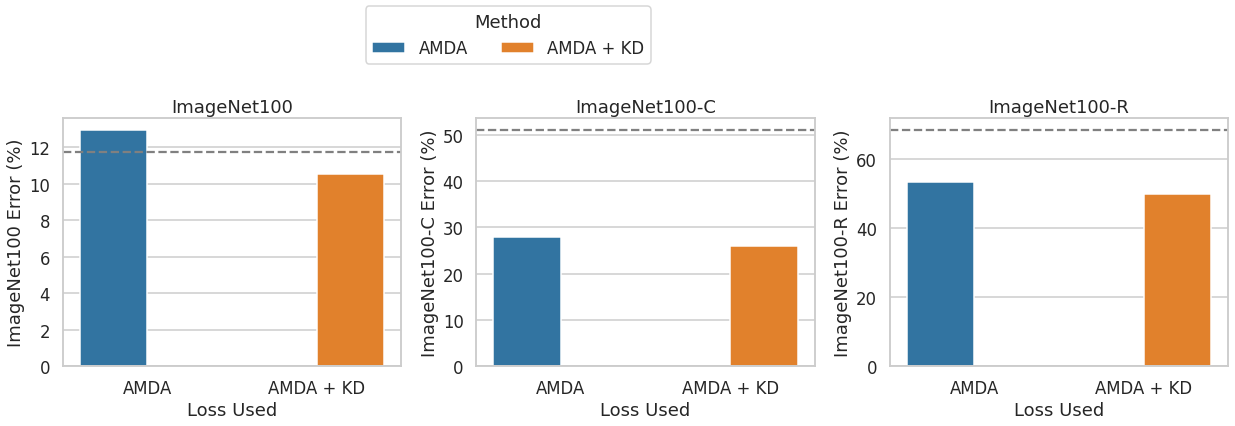

In [46]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(17.5, 5))
for ax, error in zip(axes.flatten(), ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]):
    sns.barplot(data=df_analysis, x="Loss", y=error, hue="Loss", ax=ax)
    ax.set_xlabel("Loss Used")
    ax.set_ylabel(error + " (%)")
    ax.set_title(error.split(" ")[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend('', frameon=False)
    ax.axhline(df_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
fig.legend(handles, labels, bbox_to_anchor=(0.3, 1.2), loc=2, borderaxespad=0., ncol=3, title='Method')
fig.tight_layout()
plt.savefig(f"figures/distillation_compare_amda.pdf")

In [2]:
# Baseline Plot!
df = collect(path)
df_amda = collect(*paths_amda)
df_baseline = collect(path_baseline).query("Scaling == 1")
df_distill = df[~df["Teacher"].isnull()].copy()
df_distill["Distillation Method"] = df_distill["Loss"]
df_teacher = pd.read_csv("teacher/performance.csv")
df_amda

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture
90,True,True,True,30,10.659999,25.830662,50.937662,0.1,ContrastiveDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,1,AMDA ResNet50,0.0002,4.0,None
3,True,True,True,30,NaN,NaN,NaN,0.1,KnowledgeDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/h...,1,AMDA ResNet50,0.0002,4.0,0.9


In [13]:
a = df_baseline.query("Network == 'resnet18' & Amda==True")
a.to_csv('justpath.csv')

In [4]:
df_distill = df_distill.sort_values(by=["Teacher", "Loss"])
df_distill["Distillation Method"] = df_distill["Distillation Method"].map(NAME_TEACHERS)

In [9]:
df_distill_18 = df_distill.query("Network == 'resnet18' & Teacher=='AMDA ResNet50'")
df_distill_18_no_amda = df_distill.query("Network == 'resnet18' & not Amda & Teacher=='AMDA ResNet50'")

In [10]:
df_baseline = df_baseline.query("Network == 'resnet18'")
df_baseline_amda = df_baseline.query("Network == 'resnet18' & not Amda")

In [11]:
df_distill_18

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture,Distillation Method
270,False,False,False,90,10.740000,42.610139,59.829280,0.1,AttentionDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,None,Attention (AT)
270,False,False,False,90,10.380000,45.780802,65.565184,0.1,ContrastiveDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,None,Contrastive (CRD)
270,False,False,False,90,9.719998,38.957065,57.287896,0.1,KnowledgeDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,0.9,Original (KD)


In [13]:
df_distill_18_no_amda

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture,Distillation Method
270,False,False,False,90,10.740000,42.610139,59.829280,0.1,AttentionDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,None,Attention (AT)
270,False,False,False,90,10.380000,45.780802,65.565184,0.1,ContrastiveDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,None,Contrastive (CRD)
270,False,False,False,90,9.719998,38.957065,57.287896,0.1,KnowledgeDistill,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,AMDA ResNet50,0.0002,4.0,0.9,Original (KD)


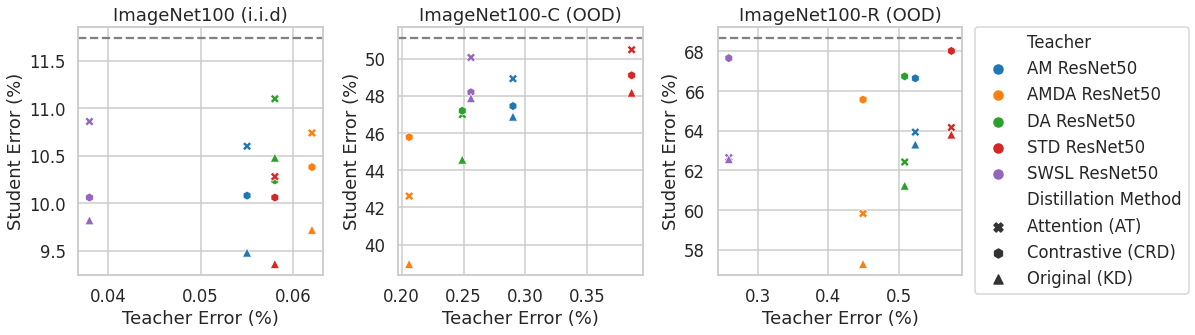

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
errors = ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]
titles = ["ImageNet100 (i.i.d)", "ImageNet100-C (OOD)", "ImageNet100-R (OOD)"]

for error, title, ax in zip(errors, titles, axes.flatten()):
    sns.scatterplot(data=df_distill_18, x="Teacher " + error, y=error , hue="Teacher", style="Distillation Method", ax=ax, markers=MARKERS_TEACHERS)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if error != "ImageNet100-R Error":
        ax.legend('', frameon=False)

    ax.set_title(title)
    ax.set_xlabel("Teacher Error (%)")
    ax.set_ylabel("Student Error (%)")
    ax.axhline(df_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
    plt.tight_layout()

plt.savefig("figures/distillation_main_plot.pdf")
# Std. Resnet50

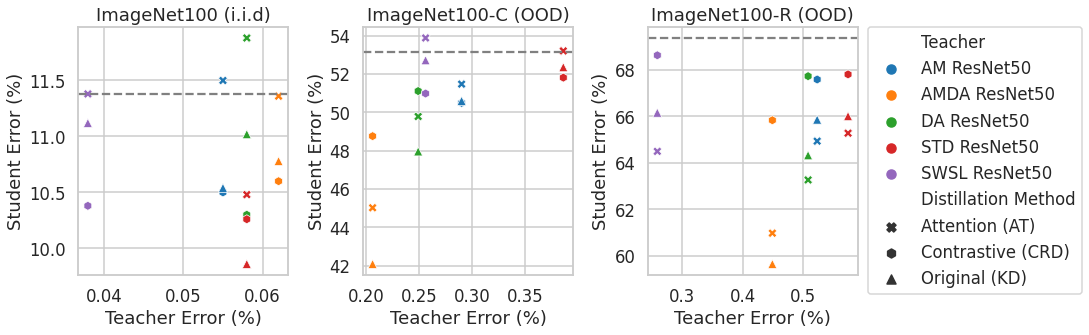

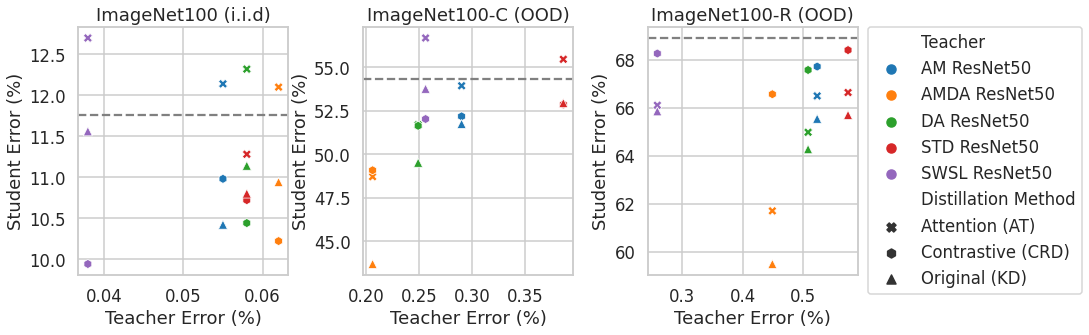

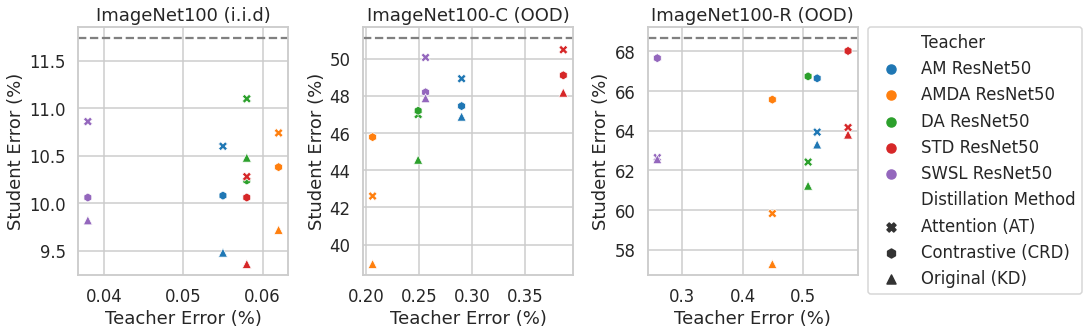

In [12]:
import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])
sns.set_style("whitegrid")
errors = ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]
titles = ["ImageNet100 (i.i.d)", "ImageNet100-C (OOD)", "ImageNet100-R (OOD)"]

for fig_num, student in zip("abc", ["mnasnet1_0", "mobilenet_v2", "resnet18"]):
    fig, axes = plt.subplots(1, 3, figsize=(15.5, 5))

    for error, title, ax in zip(errors, titles, axes.flatten()):
        df_distill_part = df_distill.query(f"Network == '{student}'")
        sns.scatterplot(data=df_distill_part, x="Teacher " + error, y=error , hue="Teacher", style="Distillation Method", ax=ax, markers=MARKERS_TEACHERS)
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        if error != "ImageNet100-R Error":
            ax.get_legend().remove()
        # ax.legend('', frameon=False)
        
        ax.set_title(title)
        ax.set_xlabel("Teacher Error (%)")
        ax.set_ylabel("Student Error (%)")
        # ax.set_title(f"Student = {student}")
        ax.axhline(df_baseline.query(f"Network == '{student}'")[error].item(), color="grey", ls="dashed")
    # fig.legend(flip(handles, 2), flip(labels, 2), loc="lower center", ncol=2, prop={"size":12}, bbox_to_anchor=(1., 1))
    plt.tight_layout()

    plt.savefig(f"figures/distillation_supp_{student}.pdf")
# Std. Resnet50

In [99]:
legend.contains

<bound method Legend.contains of <matplotlib.legend.Legend object at 0x7f397b7aabe0>>

In [85]:
fig.legends[0].__dict__

{'_stale': False,
 'stale_callback': None,
 '_axes': None,
 'figure': <Figure size 720x288 with 3 Axes>,
 '_transform': <matplotlib.transforms.IdentityTransform at 0x7f3982a24100>,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': None,
 '_agg_filter': None,
 '_mouseover': False,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': <function list.remove(value, /)>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 'prop': <matplotlib.font_manager.FontProperties at 0x7f3982a24c70>,
 '_fontsize': 16.5,
 'texts': [Text(0, 0, 'Teacher'),
  Text(0, 0, 'Std. Resnet50'),
  Text(0, 0, 'Swsl Resnet50'),
  Text(0, 0, 'Amda Resnet50'),
  Text(0, 0, 'Augmix Resnet50'),
  Text(0, 0, 'Deep. Resnet50'),
  Text(0, 0, 'Distillation 

In [7]:
sns.relplot(data=df_distill, x="Teacher " + errors[1], y=errors[1] , hue="Teacher", style="Method", kind="scatter", row="")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.legend('', frameon=False)

NameError: name 'errors' is not defined

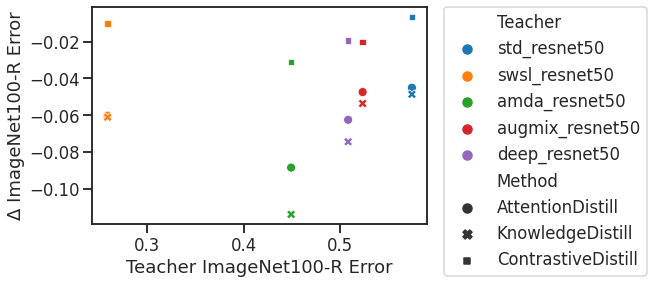

In [101]:
sns.scatterplot(data=df_distill, x="Teacher " + errors[2], y="Δ " + errors[2] , hue="Teacher", style="Method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.legend('', frameon=False)

In [47]:
for idx in len(df_distill):
    for error

,Amda,Augmix,DeepAugment,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Loss,Network,Path,Scaling
270,False,False,False,0.1138,0.531680,0.693740,StandardLoss,mnasnet1_0,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0
270,False,False,False,0.1174,0.511125,0.686692,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0
270,False,False,False,0.1176,0.543219,0.689020,StandardLoss,mobilenet_v2,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0
